# Identidicando e Removendo Outliers

In [21]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (14,6))

In [22]:
dados = pd.read_csv('dadoslimpos.csv',sep=';')

# Box-plot

<AxesSubplot: >

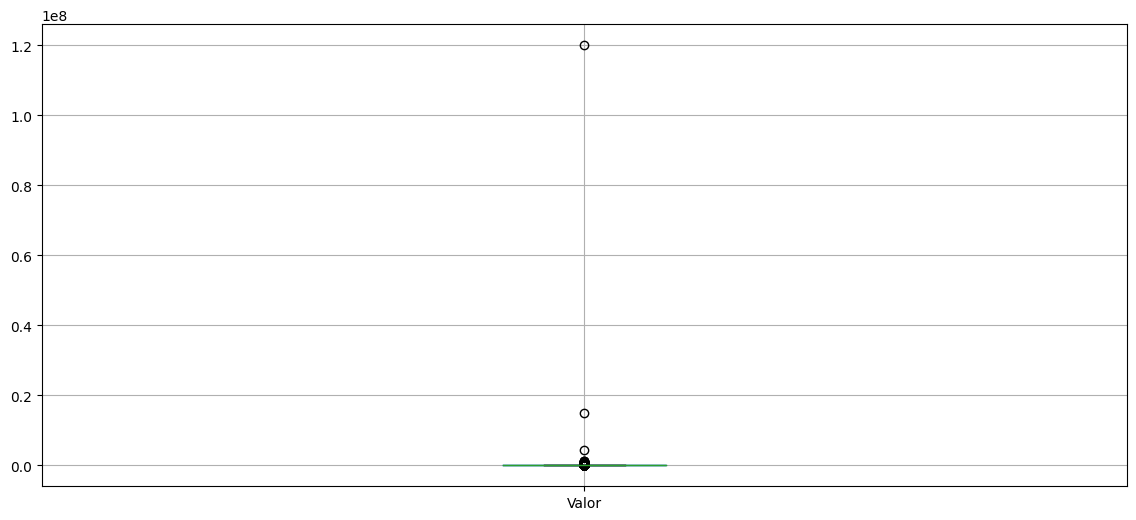

In [23]:
dados.boxplot(['Valor'])

In [24]:
dados[dados['Valor']>= 500000]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
810,Conjunto Comercial/Sala,Barra da Tijuca,0,0,0,5124,614000.0,0.0,0.0
866,Conjunto Comercial/Sala,Botafogo,0,56,0,4235,529375.0,114599.0,34345.0
1142,Conjunto Comercial/Sala,Cidade Nova,0,47,0,7357,514990.0,166709.0,14787.0
2666,Conjunto Comercial/Sala,Centro,0,15,0,5666,530000.0,1.0,1.0
2931,Prédio Inteiro,Barra da Tijuca,0,40,0,7500,600000.0,162000.0,13350.0
4499,Galpão/Depósito/Armazém,Irajá,0,5,0,1100,15000000.0,0.0,1000.0
4532,Prédio Inteiro,Centro,0,0,0,6986,560000.0,0.0,0.0
5448,Conjunto Comercial/Sala,Centro,0,30,0,4940,612550.0,128440.0,0.0
5474,Prédio Inteiro,Jacarepaguá,0,15,0,1200,120000000.0,0.0,10000.0
7889,Prédio Inteiro,Centro,0,90,0,7774,505310.0,0.0,0.0


In [25]:
dados

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0
...,...,...,...,...,...,...,...,...,...
32193,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32194,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32195,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0
32196,Apartamento,Leblon,2,0,0,70,3000.0,760.0,0.0


In [26]:
valor = dados['Valor']
q1 = valor.quantile(.25)
q3 = valor.quantile(.75)

iiq= q3 - q1
limite_inferior = q1-1.5* iiq
limite_superior = q3 + 1.5*iiq

In [27]:
selecao = (valor >= limite_inferior) & (valor <= limite_superior)
dados_new = dados[selecao]

<AxesSubplot: >

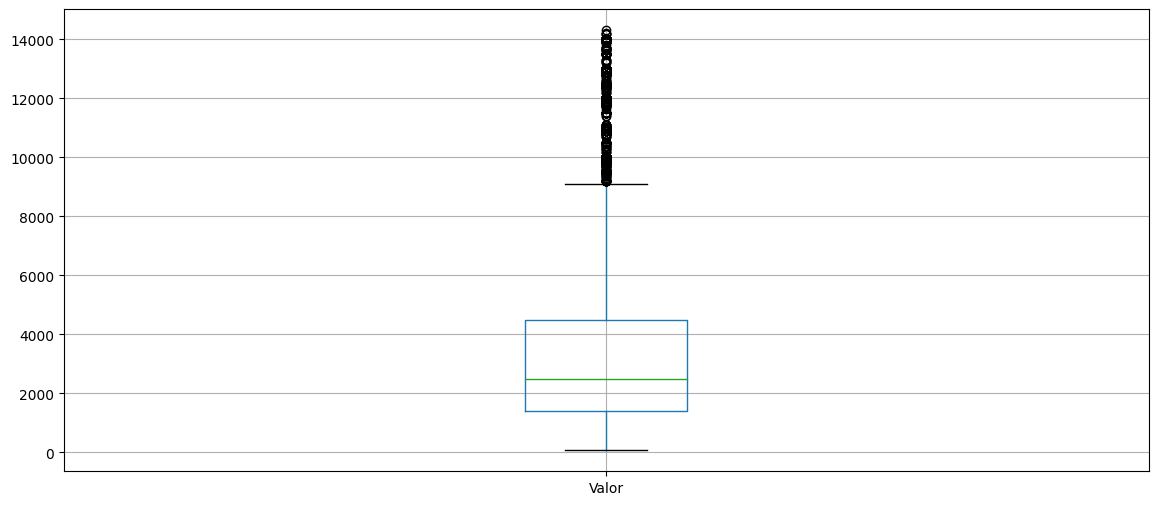

In [29]:
dados_new.boxplot(['Valor'])

array([[<AxesSubplot: title={'center': 'Valor'}>]], dtype=object)

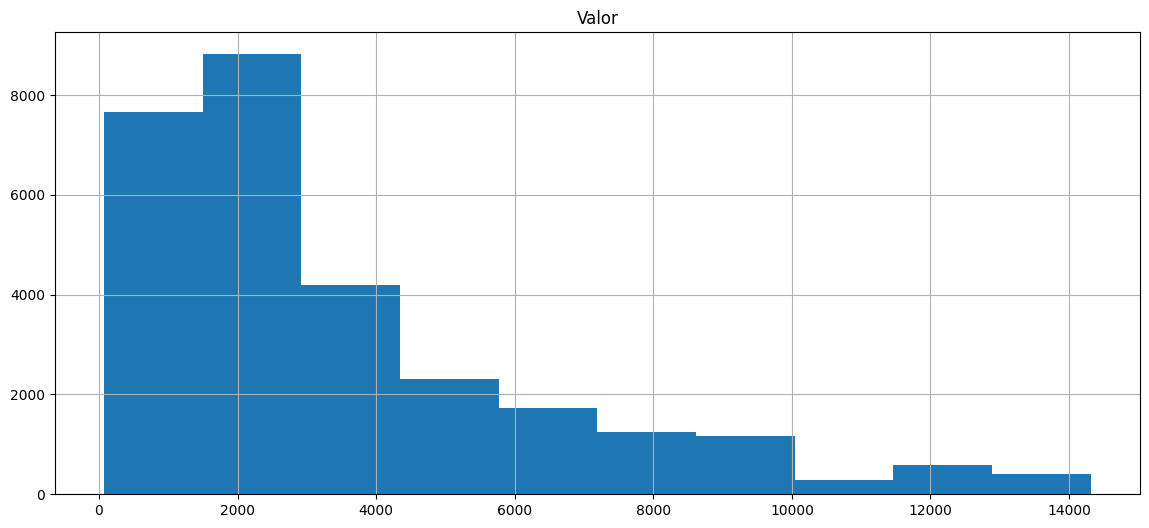

In [30]:
dados_new.hist(['Valor'])

# Removendo Outliers

<AxesSubplot: title={'center': 'Valor'}, xlabel='[Tipo]'>

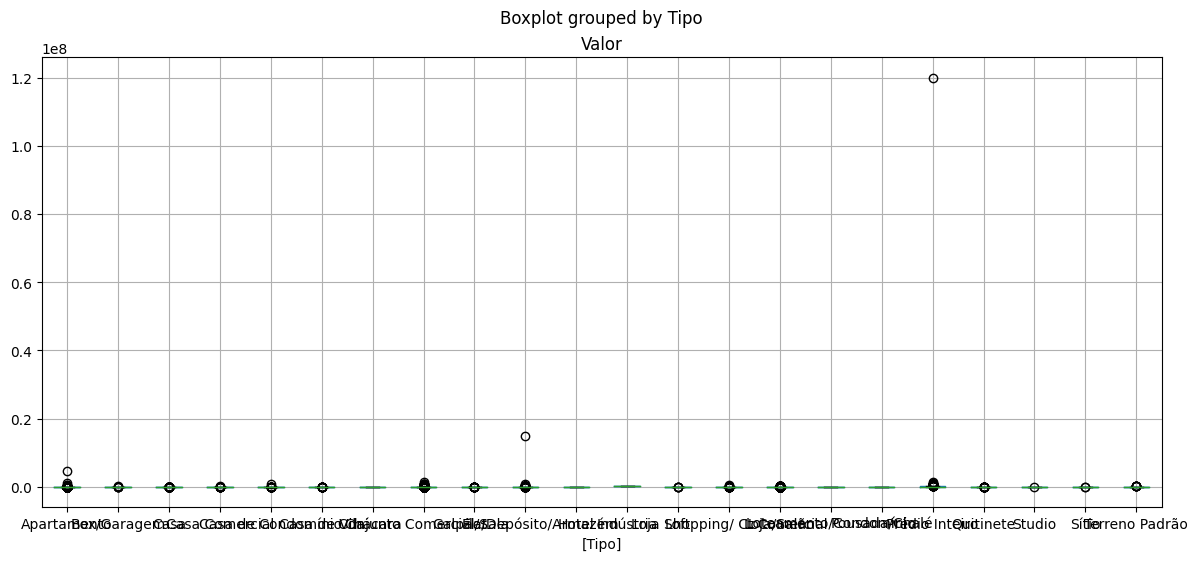

In [31]:
dados.boxplot(['Valor'] , by =['Tipo'])

In [32]:
grupo_tipo = dados.groupby('Tipo')['Valor']

In [33]:
grupo_tipo

In [34]:
q1 = grupo_tipo.quantile(.25)
q3 = grupo_tipo.quantile(.75)

iiq= q3 - q1
limite_inferior = q1-1.5* iiq
limite_superior = q3 + 1.5*iiq

In [37]:
# limite_inferior
limite_superior['Casa']

22850.0

In [43]:
dados_new = pd.DataFrame()
for tipo in grupo_tipo.groups.keys():
    eh_tipo = dados["Tipo"] == tipo
    eh_dentro_limite = (dados["Valor"]>= limite_inferior[tipo]) & (dados['Valor']<= limite_superior[tipo])
    selecao = eh_tipo & eh_dentro_limite
    dados_selecao = dados[selecao]
    dados_new = pd.concat ([dados_new, dados_selecao])

<AxesSubplot: title={'center': 'Valor'}, xlabel='[Tipo]'>

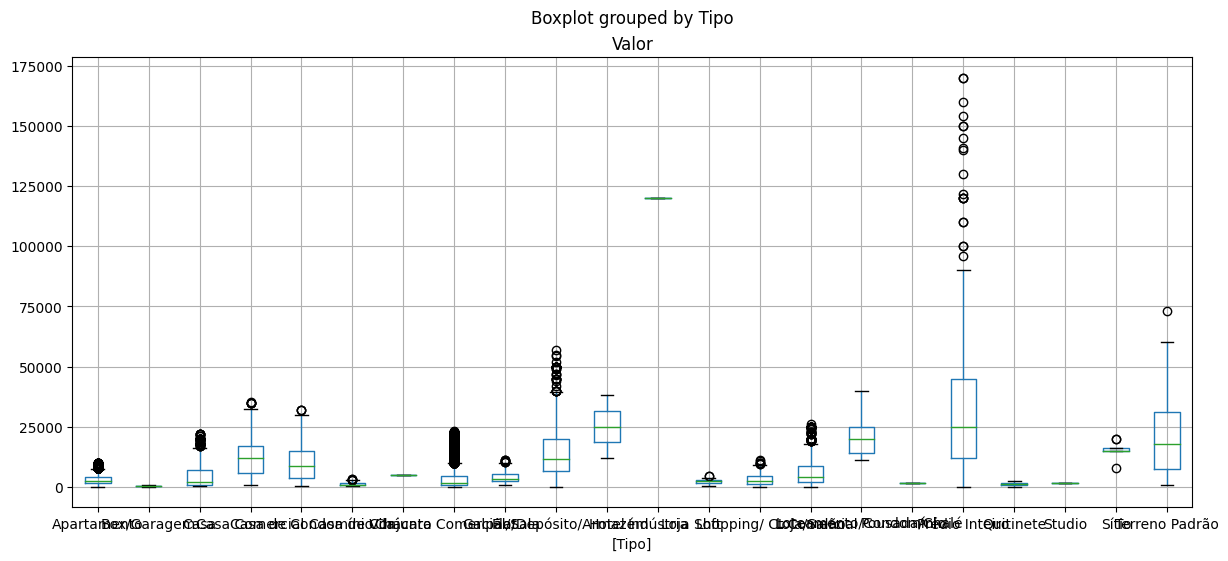

In [44]:
dados_new.boxplot(['Valor'], by = ['Tipo'])

In [45]:
dados_new.to_csv('aluguel_residencial_sem_outliers.csv',sep=';', index= False)